In [3]:
import pandas as pd
import re
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def isi915(f):
    return "drivers/gpu/drm/i915/" in f or "include/drm/i915" in f or "include/uapi/drm/i915_drm.h" in f or "Documentation/gpu/i915.rst" in f

In [5]:
commits = pd.read_pickle("commits.pkl")

In [6]:
commits['isi915'] = commits.files.map(isi915)

In [7]:
selected = commits[commits.isi915]

In [8]:
# reviewer count

In [9]:
p = re.compile("Reviewed-by: (.*) <.*>")
p_email = re.compile("Reviewed-by: .* <(.*)>")

In [10]:
# new reviewers

In [11]:
active_month = defaultdict(set)
for year in range(2010,2018):
    for month in range(1,13):
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        #print year, month

        for msg in subset.message:
            names = p.findall(msg)
            for dev in names:
                dev = dev.strip().replace('"', '').lower()
                active_month[dev].add((year,month))
active = {k:len(v) for k,v in active_month.items()}

In [12]:
active

{u'(v3) paulo zanoni': 1,
 u': ville syrj\xe4l\xe4': 1,
 u'a.sunil kamath': 3,
 u'aaron lu': 2,
 u'adam jackson': 15,
 u'akash goel': 5,
 u'alex dai': 4,
 u'alex deucher': 21,
 u'allen kay': 1,
 u'ander conselvan de oliveira': 29,
 u'animesh manna': 3,
 u'antti koskipaa': 3,
 u'antti koskip\xe4\xe4': 8,
 u'anusha srivatsa': 2,
 u'arkadiusz hiler': 3,
 u'art runyan': 2,
 u'arthur runyan': 1,
 u'arun r murthy': 2,
 u'arun siluvery': 13,
 u'barbalho, rafael': 1,
 u'ben widawsky': 45,
 u'bob paauwe': 7,
 u'boris brezillon': 1,
 u'brad volkin': 4,
 u'bride, jim': 1,
 u'carl worth': 2,
 u'chad versace': 1,
 u'chandra konduru': 2,
 u'chon ming lee': 3,
 u'chris wilons': 1,
 u'chris wilsno': 1,
 u'chris wilson': 75,
 u'chris wison': 1,
 u'chris wlison': 1,
 u'christian k\xf6nig': 2,
 u'christoph hellwig': 1,
 u'chuanxiao dong': 1,
 u'ciobanu, nathan d': 1,
 u'clint taylor': 5,
 u'clinton taylor': 1,
 u'cooper chiou': 3,
 u'cyril brulebois': 1,
 u'damien lespiau': 42,
 u'daniel kurtz': 2,
 u'da

In [13]:
# new committers

In [15]:
result = {}
log = {}
seen = set()
for year in range(2010,2018):
    for month in range(1,13):
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        new_committers = 0
        committers = set()
        for idx in subset.index:
            committer = subset.loc[idx].committer_name
            if committer not in seen:
                new_committers += 1
                seen.add(committer)
                committers.add(committer)

            
        if year >= 2013:
            result[(year, month)] = new_committers
            log[(year, month)] = committers
        #print year, month

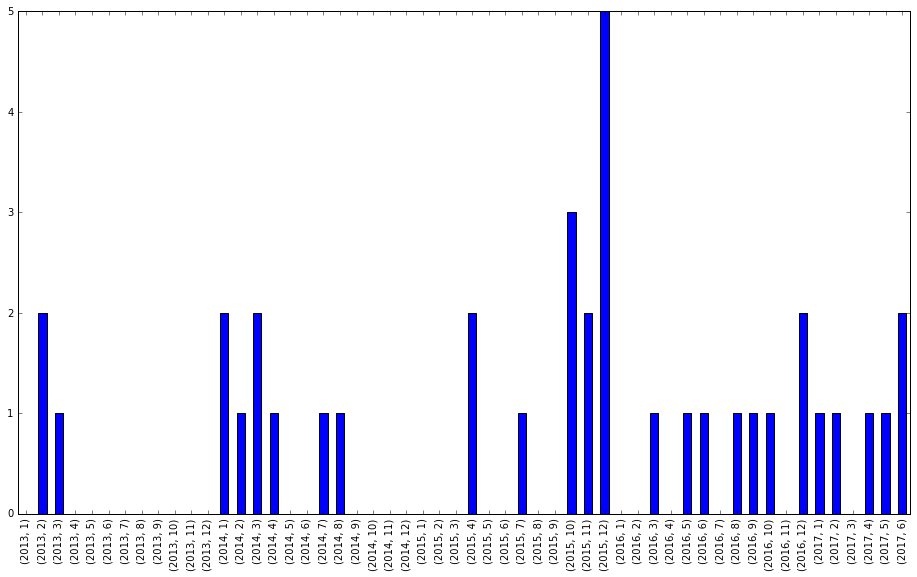

In [16]:
plt.figure(figsize=(16,9))
pd.Series(result).plot('bar', color='blue')

In [17]:
log

{(2013, 1): set(),
 (2013, 2): {u'Al Viro', u'Thierry Reding'},
 (2013, 3): {u'Rafael J. Wysocki'},
 (2013, 4): set(),
 (2013, 5): set(),
 (2013, 6): set(),
 (2013, 7): set(),
 (2013, 8): set(),
 (2013, 9): set(),
 (2013, 10): set(),
 (2013, 11): set(),
 (2013, 12): set(),
 (2014, 1): {u'Bjorn Helgaas', u'Ville Syrj\xe4l\xe4'},
 (2014, 2): {u'Ingo Molnar'},
 (2014, 3): {u'David Herrmann', u'Jani Nikula'},
 (2014, 4): {u'Christian K\xf6nig'},
 (2014, 5): set(),
 (2014, 6): set(),
 (2014, 7): {u'John Stultz'},
 (2014, 8): {u'Rusty Russell'},
 (2014, 9): set(),
 (2014, 10): set(),
 (2014, 11): set(),
 (2014, 12): set(),
 (2015, 1): set(),
 (2015, 2): set(),
 (2015, 3): set(),
 (2015, 4): {u'Steven Rostedt', u'Sumit Semwal'},
 (2015, 5): set(),
 (2015, 6): set(),
 (2015, 7): {u'Thomas Gleixner'},
 (2015, 8): set(),
 (2015, 9): set(),
 (2015, 10): {u'Maarten Lankhorst', u'Matt Roper', u'Tvrtko Ursulin'},
 (2015, 11): {u'Ander Conselvan de Oliveira', u'Imre Deak'},
 (2015, 12): {u'Damien Les

In [57]:
selected[selected.committer_name == 'Paulo Zanoni'].committed_datetime.map(lambda t: t.year*100+t.month).value_counts().sort_index()

201512    11
201601    25
201602     4
201606     4
201609    12
201610    14
201611     7
201612     8
201701     5
201703     7
201708     1
Name: committed_datetime, dtype: int64

In [59]:
selected[selected.author_name == 'Paulo Zanoni']

,hexsha,authored_datetime,author_name,author_email,committed_datetime,committer_name,committer_email,summary,message,files,isi915
8793,6c64dd378aca528903cb9f7a60d04fc5c1a3bdbd,2017-08-11 23:38:25+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-08-16 14:42:36+00:00,Rodrigo Vivi,rodrigo.vivi@intel.com,drm/i915/gen10: implement gen 10 watermarks ca...,drm/i915/gen10: implement gen 10 watermarks ca...,drivers/gpu/drm/i915/intel_pm.c,True
10203,dfc267ab5acb2ce73078097875f24985942765af,2017-08-09 20:52:46+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-08-10 20:59:28+00:00,Rodrigo Vivi,rodrigo.vivi@intel.com,drm/i915/gen10: fix WM latency printing,drm/i915/gen10: fix WM latency printing\n\nGen...,drivers/gpu/drm/i915/intel_pm.c,True
10204,fdd11c2bfce22e57145e861905b2753c0451df85,2017-08-09 20:52:45+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-08-10 20:59:28+00:00,Rodrigo Vivi,rodrigo.vivi@intel.com,drm/i915/gen10: fix the gen 10 SAGV block time,drm/i915/gen10: fix the gen 10 SAGV block time...,drivers/gpu/drm/i915/intel_pm.c,True
10206,50682ee63fa3480b0541d0a311239189634b68ab,2017-08-09 20:52:43+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-08-10 20:59:27+00:00,Rodrigo Vivi,rodrigo.vivi@intel.com,drm/i915/gen10+: use the SKL code for reading ...,drm/i915/gen10+: use the SKL code for reading ...,drivers/gpu/drm/i915/intel_pm.c,True
13407,525a4f938290b6c7c4dd1cf0c86291817f082acf,2017-07-14 19:38:22+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-07-27 07:38:58+00:00,Daniel Vetter,daniel.vetter@ffwll.ch,drm/i915/fbc: add comments to the FBC auxiliar...,drm/i915/fbc: add comments to the FBC auxiliar...,drivers/gpu/drm/i915/i915_drv.h,True
13408,746a51732688de0b808dbe9562e103bed66b955a,2017-07-14 17:52:28+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-07-27 07:38:58+00:00,Daniel Vetter,daniel.vetter@ffwll.ch,drm/i915: cleanup the CHICKEN_MISC_2 (re)defin...,drm/i915: cleanup the CHICKEN_MISC_2 (re)defin...,"drivers/gpu/drm/i915/i915_reg.h,drivers/gpu/dr...",True
24931,3c2e0fd92c194f495aaa8a8a1c86ea1b8c4bd304,2017-06-06 20:30:34+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-06-07 14:28:56+00:00,Rodrigo Vivi,rodrigo.vivi@intel.com,drm/i915/cnl: add IS_CNL_REVID macro,drm/i915/cnl: add IS_CNL_REVID macro\n\nWe're ...,drivers/gpu/drm/i915/i915_drv.h,True
39071,d7c530b25946e323fc188cd06777ac94f2eddb95,2017-03-30 20:57:52+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-31 14:32:41+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: make a few DDI functions static,drm/i915: make a few DDI functions static\n\nW...,"drivers/gpu/drm/i915/intel_ddi.c,drivers/gpu/d...",True
40509,44a126ba5d13db90945115324851466685b03733,2017-03-22 18:58:45+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-27 20:24:33+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: kill intel_ddi_pll_select(),drm/i915: kill intel_ddi_pll_select()\n\nAll i...,"drivers/gpu/drm/i915/intel_ddi.c,drivers/gpu/d...",True
41573,396a1200d8202f7cd154e26dcc47438e28ef6c70,2017-03-22 18:58:44+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-22 19:08:54+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: simplify intel_ddi_pll_select(),drm/i915: simplify intel_ddi_pll_select()\n\nB...,drivers/gpu/drm/i915/intel_ddi.c,True


In [60]:
selected[selected.committer_name == 'Paulo Zanoni']

,hexsha,authored_datetime,author_name,author_email,committed_datetime,committer_name,committer_email,summary,message,files,isi915
8270,cec3bb013ac6743f3e3eb3a6bedc4f20a71ef942,2017-08-16 23:45:14+00:00,Anusha Srivatsa,anusha.srivatsa@intel.com,2017-08-17 21:01:39+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: Split pin mapping into per platform ...,drm/i915: Split pin mapping into per platform ...,drivers/gpu/drm/i915/intel_hdmi.c,True
39071,d7c530b25946e323fc188cd06777ac94f2eddb95,2017-03-30 20:57:52+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-31 14:32:41+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: make a few DDI functions static,drm/i915: make a few DDI functions static\n\nW...,"drivers/gpu/drm/i915/intel_ddi.c,drivers/gpu/d...",True
40509,44a126ba5d13db90945115324851466685b03733,2017-03-22 18:58:45+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-27 20:24:33+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: kill intel_ddi_pll_select(),drm/i915: kill intel_ddi_pll_select()\n\nAll i...,"drivers/gpu/drm/i915/intel_ddi.c,drivers/gpu/d...",True
41573,396a1200d8202f7cd154e26dcc47438e28ef6c70,2017-03-22 18:58:44+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-22 19:08:54+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: simplify intel_ddi_pll_select(),drm/i915: simplify intel_ddi_pll_select()\n\nB...,drivers/gpu/drm/i915/intel_ddi.c,True
41576,8cbeb06dc6b584009d7492c667a3c9a4b96cdefa,2017-03-14 22:45:56+00:00,"Pandiyan, Dhinakaran",dhinakaran.pandiyan@intel.com,2017-03-22 19:05:11+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: Implement cdclk restrictions based o...,drm/i915: Implement cdclk restrictions based o...,drivers/gpu/drm/i915/intel_cdclk.c,True
41577,78cfa580f81e69857815c59c8908aee454726da1,2017-03-08 00:12:51+00:00,"Pandiyan, Dhinakaran",dhinakaran.pandiyan@intel.com,2017-03-22 19:04:33+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915/glk: Apply cdclk workaround for DP audio,drm/i915/glk: Apply cdclk workaround for DP au...,drivers/gpu/drm/i915/intel_cdclk.c,True
44794,e1cd3325b7a7b57717b6e84028edb33164a83bab,2017-02-21 21:23:27+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-07 18:14:28+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,"drm/i915: move the {skl, bxt}_{i, uni}nit_cdcl...","drm/i915: move the {skl, bxt}_{i, uni}nit_cdcl...",drivers/gpu/drm/i915/intel_drv.h,True
44796,6b9e441df4b56f6cc9be0cbd2b4015b240d217dd,2017-02-20 20:00:41+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-03-07 17:58:47+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: remove potentially confusing IS_G4X ...,drm/i915: remove potentially confusing IS_G4X ...,drivers/gpu/drm/i915/intel_cdclk.c,True
53705,920bcd1820a6966b6224f62eadcb4e931bb72e8e,2017-01-26 20:19:07+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-01-27 13:04:12+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: make i915_stolen_to_physical() retur...,drm/i915: make i915_stolen_to_physical() retur...,drivers/gpu/drm/i915/i915_gem_stolen.c,True
58437,fd7d6c5c8f3e46bf168c8560c842285c13ab7dd7,2016-12-23 12:23:58+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,2017-01-04 16:44:05+00:00,Paulo Zanoni,paulo.r.zanoni@intel.com,drm/i915: enable FBC on gen9+ too,drm/i915: enable FBC on gen9+ too\n\nGen9+ pla...,drivers/gpu/drm/i915/intel_fbc.c,True


In [240]:
result = {}
log = {}
seen = set()
for year in range(2010,2018):
    for month in range(1,13):
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        #print year, month
        reviewers = set()
        new_reviewers = 0
        for msg in subset.message:
            names = p.findall(msg)
            for dev in names:
                dev = dev.strip().replace('"', '').lower()
                if dev not in seen:
                    new_reviewers += 1
                    seen.add(dev)
                    reviewers.add(dev)
        if year >= 2013:
            result[(year, month)] = new_reviewers
            log[(year, month)] = reviewers
        #print year, month

In [241]:
log[(2014, 5)]

{u'akash goel',
 u'naresh kumar kachhi',
 u'oscar mateo',
 u'rafael barbalho',
 u'robert beckett',
 u'sourab gupta',
 u'thomas wood',
 u'tvrtko ursulin'}

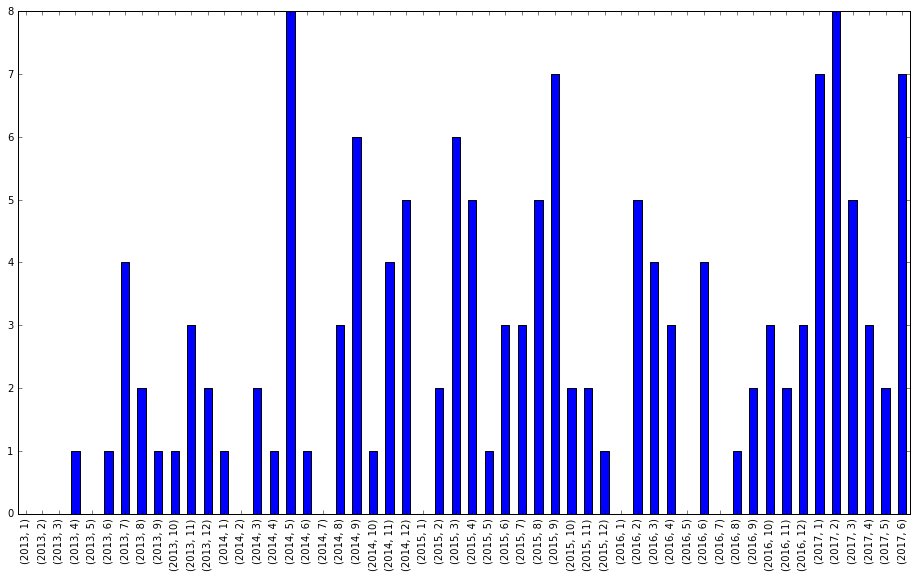

In [242]:
plt.figure(figsize=(16,9))
pd.Series(result).plot('bar', color='blue')

In [243]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        #print year, month
        reviewers = set()
        for msg in subset.message:
            names = p.findall(msg)
            for dev in names:
                dev = dev.strip().replace('"', '').lower()
                reviewers.add(dev)
                counter[dev] += 1
        result[(year, month)] = len(reviewers)
        print year, month
        print sum(counter.values()) * 1.0 / subset.shape[0]
        print pd.Series(counter).sort_values(ascending=False)

2013 1
0.55737704918
damien lespiau    13
rodrigo vivi      12
imre deak         11
paulo zanoni       7
jani nikula        7
rob clark          4
chris wilson       4
ville syrjälä      3
jesse barnes       3
ben widawsky       2
daniel vetter      1
carl worth         1
dtype: int64
2013 2
0.535714285714
chris wilson      10
paulo zanoni       5
ben widawsky       5
rob clark          3
jani nikula        2
damien lespiau     2
ville syrjälä      1
rodrigo vivi       1
alex deucher       1
dtype: int64
2013 3
0.573643410853
jesse barnes      19
chris wilson      12
ville syrjälä     11
paulo zanoni      11
ben widawsky       8
rodrigo vivi       5
damien lespiau     3
jani nikula        2
imre deak          2
eric anholt        1
dtype: int64
2013 4
0.635359116022
jani nikula        24
imre deak          16
ville syrjälä      15
jesse barnes       13
chris wilson       13
mika kuoppala      11
damien lespiau     10
paulo zanoni        7
ben widawsky        3
sean paul           1
ken

In [121]:
#daniel!

In [126]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        #print year, month
        reviewers = set()
        for msg in subset.message:
            names = p.findall(msg)
            if len(names) == 0:
                counter['daniel vetter'] += 1
            for dev in names:
                dev = dev.strip().replace('"', '').lower()
                reviewers.add(dev)
                counter[dev] += 1
        result[(year, month)] = counter['daniel vetter']

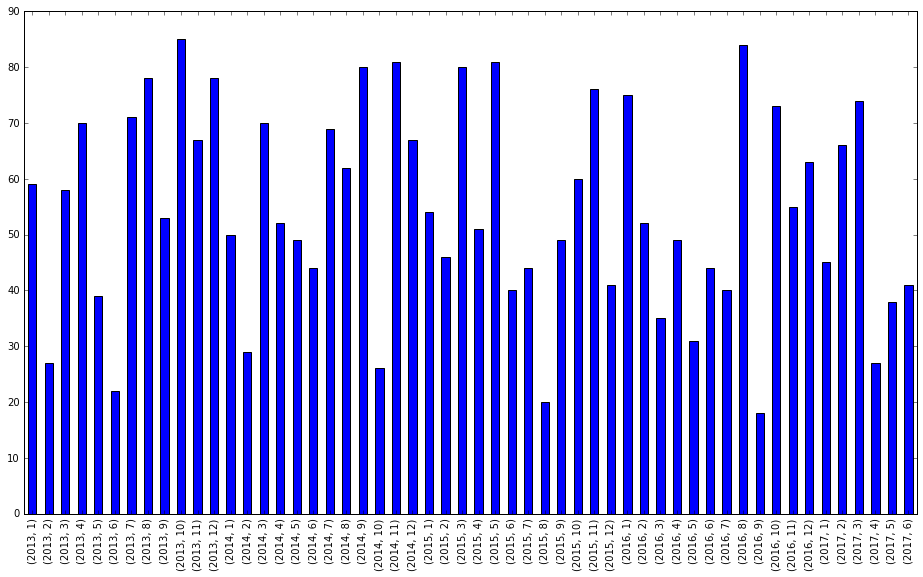

In [127]:
plt.figure(figsize=(16,9), facecolor="white")
pd.Series(result).plot('bar', color='blue')

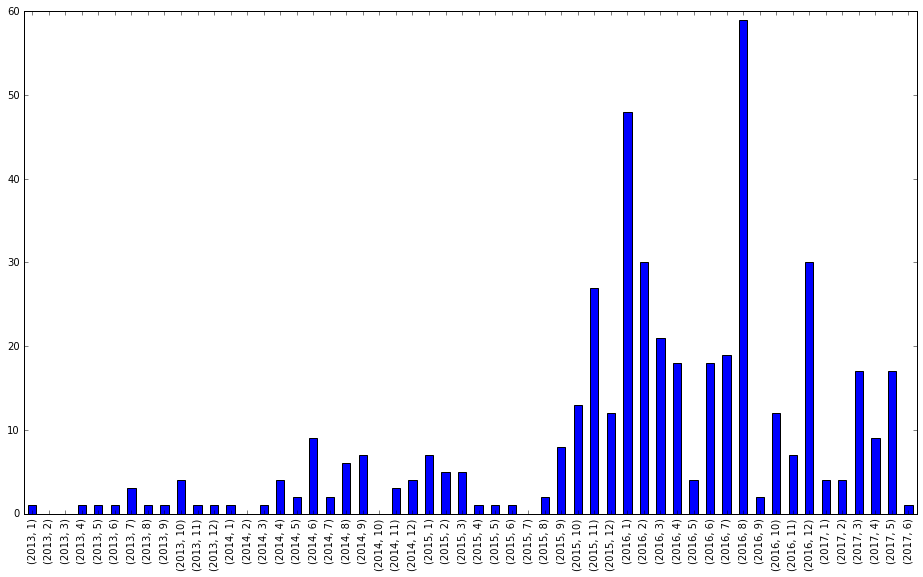

In [128]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        #print year, month
        reviewers = set()
        for msg in subset.message:
            names = p.findall(msg)
            if len(names) == 0:
                counter['daniel vetter'] += 0
            for dev in names:
                dev = dev.strip().replace('"', '').lower()
                reviewers.add(dev)
                counter[dev] += 1
        result[(year, month)] = counter['daniel vetter']
plt.figure(figsize=(16,9), facecolor="white")
pd.Series(result).plot('bar', color='blue')

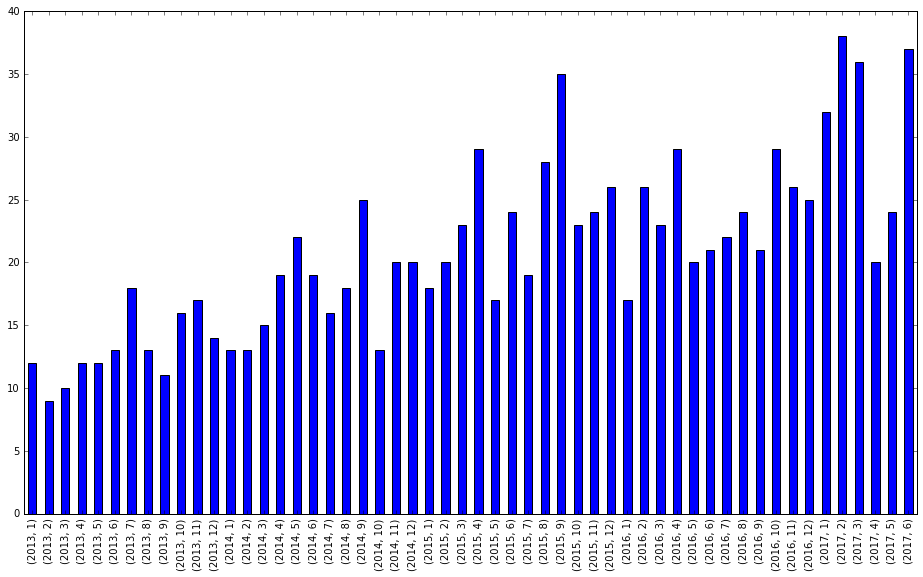

In [244]:
plt.figure(figsize=(16,9), facecolor="white")
pd.Series(result).plot('bar', color="blue")

In [30]:
# review ratio

In [19]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        reviewed = subset[subset.message.map(lambda m: "Reviewed-by: " in m)]
        result[(year, month)] = {"total": subset.shape[0], "reviewed": reviewed.shape[0]}

In [24]:
df = pd.DataFrame(result).T
df['ratio'] = df.reviewed * 1.0 / df.total

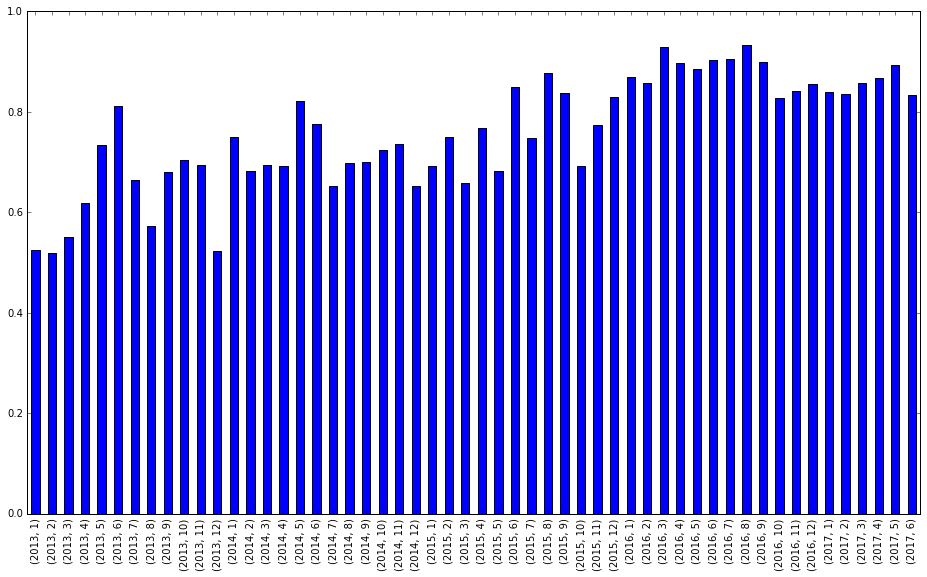

In [27]:
plt.figure(figsize=(16,9), facecolor="white")
df.ratio.plot('bar', color="blue")

In [32]:
# no review analysis

In [211]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        no_review = subset[subset.message.map(lambda m: "Reviewed-by: " not in m)]
        if year == 2017 and month > 6:
            break
        print year, month
        print no_review.author_name.value_counts()
        print no_review.committer_name.value_counts()
        print "---"
        result[(year, month)] = no_review.shape[0] * 1.0 / subset.shape[0]

2013 1
Ville Syrjälä         30
Chris Wilson           7
Daniel Vetter          6
Jani Nikula            4
Imre Deak              3
Paulo Zanoni           2
Changlong Xie          1
Egbert Eich            1
Greg Kroah-Hartman     1
Masanari Iida          1
Seung-Woo Kim          1
Ben Widawsky           1
Name: author_name, dtype: int64
Daniel Vetter         54
Dave Airlie            2
Jiri Kosina            1
Greg Kroah-Hartman     1
Name: committer_name, dtype: int64
---
2013 2
Paulo Zanoni         7
Ben Widawsky         5
Daniel Vetter        3
Mika Kuoppala        3
Damien Lespiau       2
Ville Syrjälä        2
Zhang Rui            1
Yasuaki Ishimatsu    1
Tejun Heo            1
Al Viro              1
Jani Nikula          1
Name: author_name, dtype: int64
Daniel Vetter     25
Linus Torvalds     1
Al Viro            1
Name: committer_name, dtype: int64
---
2013 3
Paulo Zanoni              13
Jesse Barnes               9
Ben Widawsky               5
Imre Deak                  4
Kees 

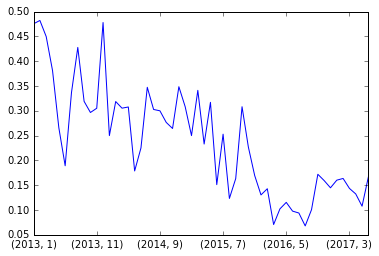

In [212]:
pd.Series(result).plot()

In [21]:
# coordination network?
import networkx as nx

2013 1
4


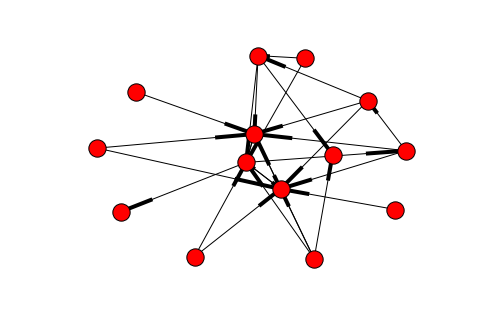

2013 2
3


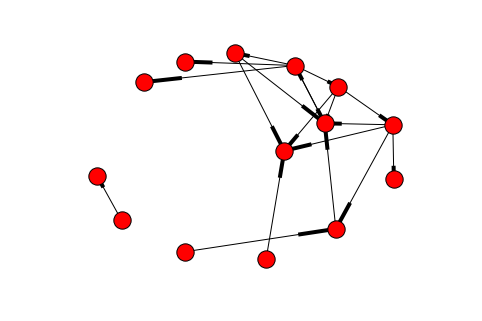

2013 3
5


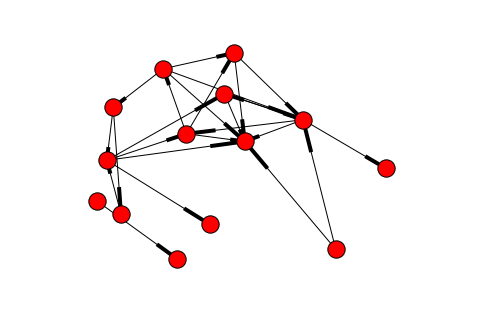

2013 4
5


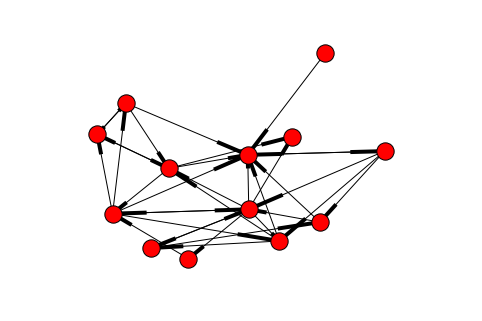

2013 5
4


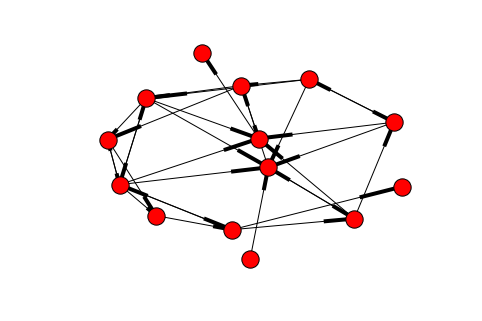

2013 6
3


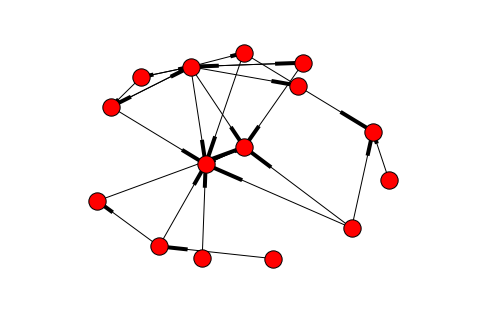

2013 7
4


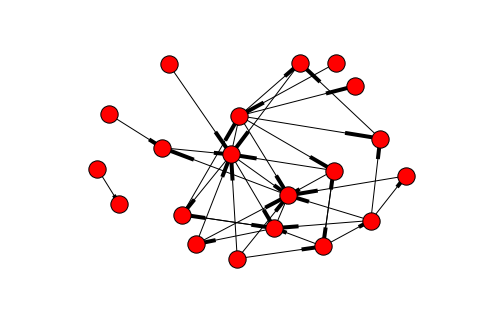

2013 8
3


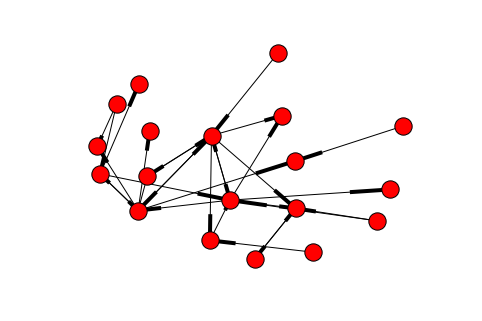

2013 9
5


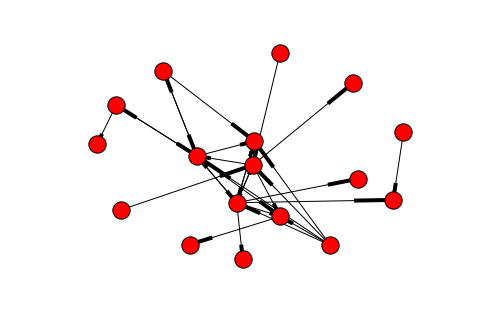

2013 10
5


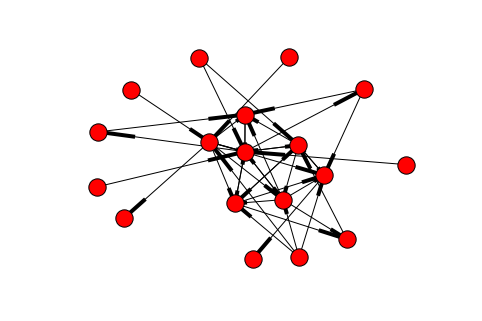

2013 11
5


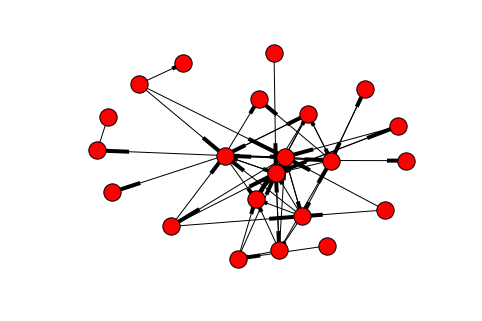

2013 12
3


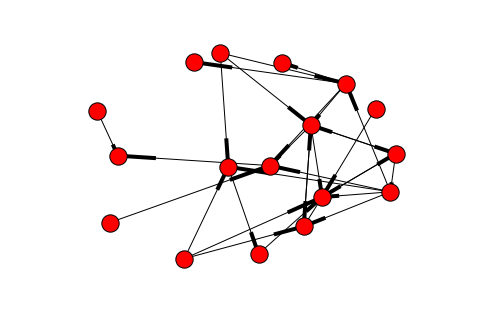

2014 1
4


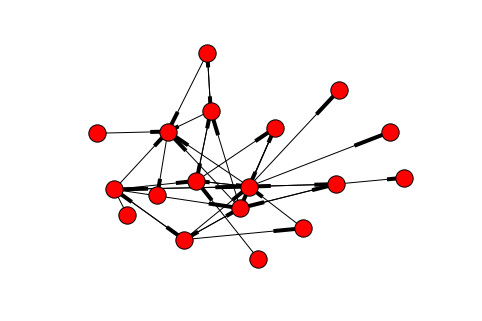

2014 2
3


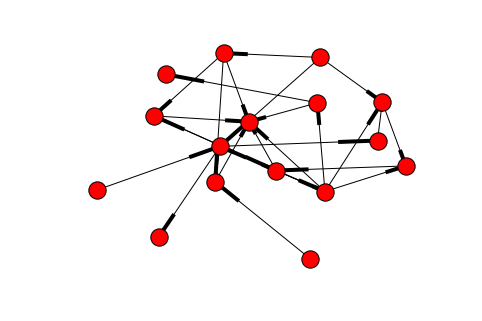

2014 3
4


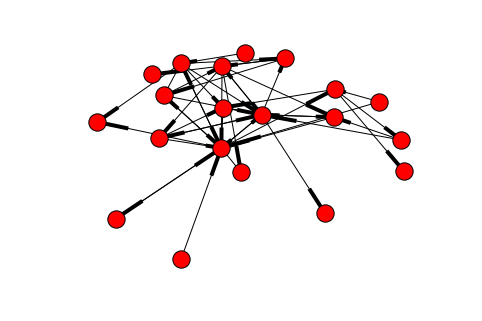

2014 4
4


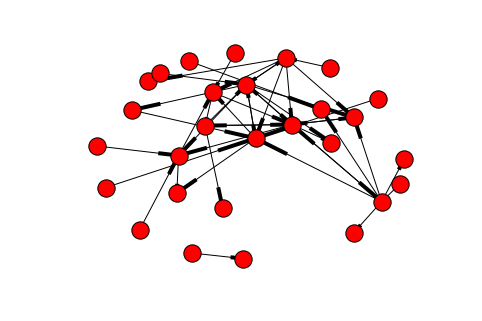

2014 5
5


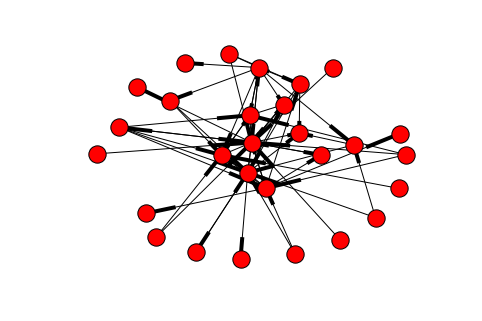

2014 6
3


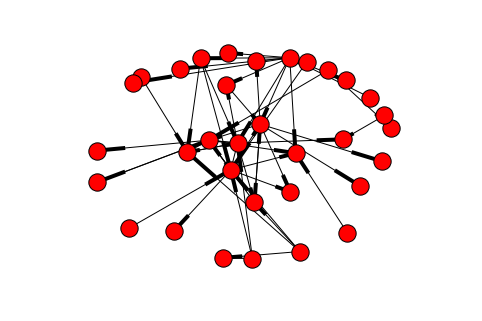

2014 7
4


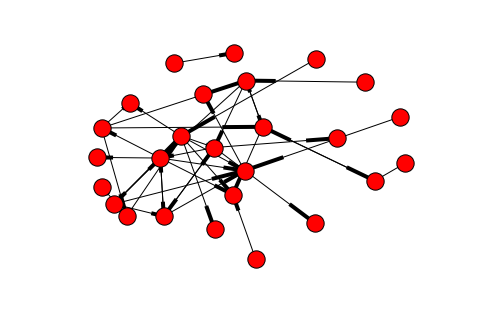

2014 8
3


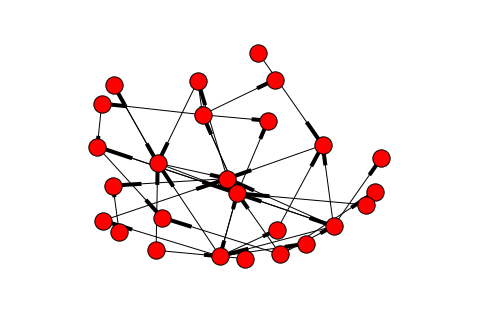

2014 9
4


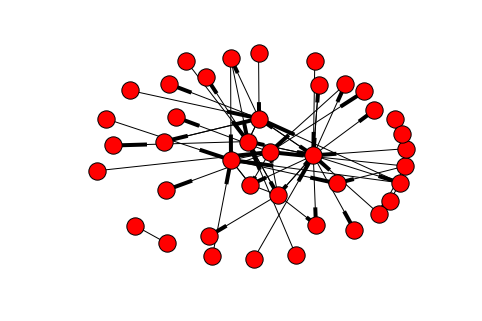

2014 10
3


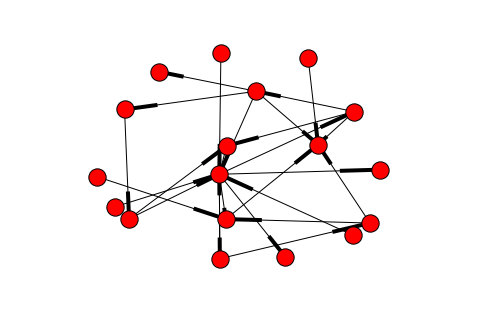

2014 11
4


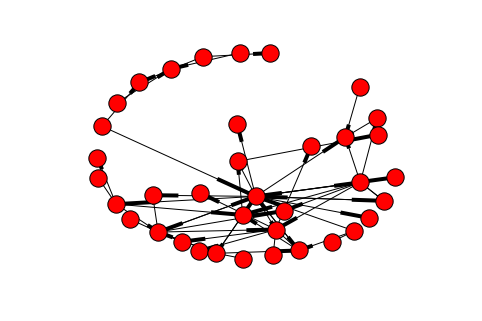

2014 12
4


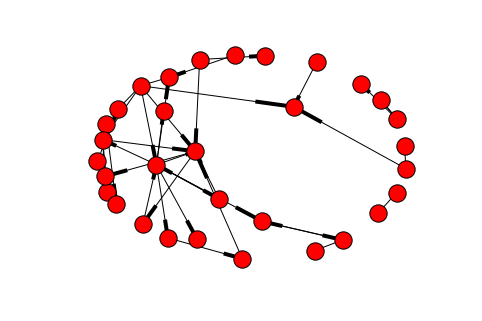

2015 1
3


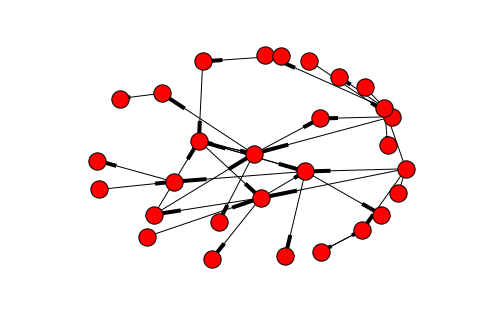

2015 2
3


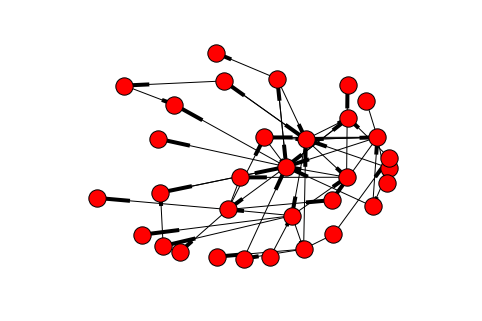

2015 3
4


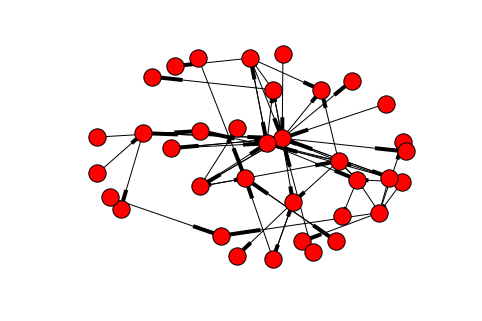

2015 4
3


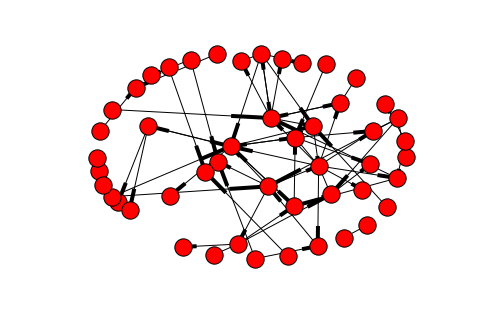

2015 5
4


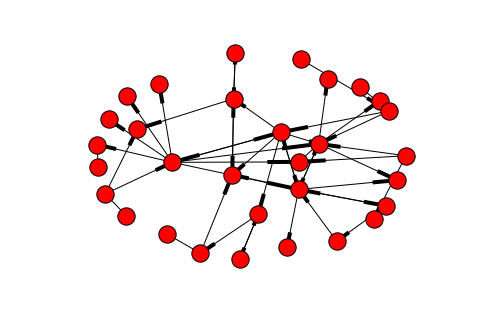

2015 6
3


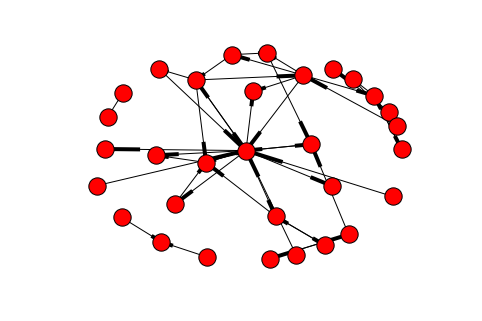

2015 7
3


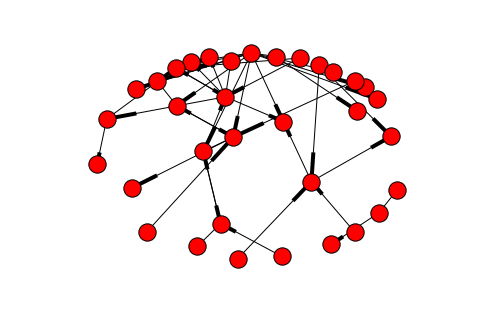

2015 8
3


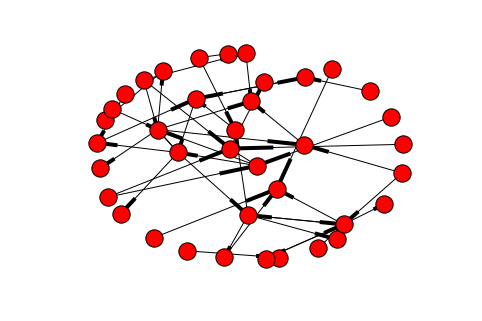

2015 9
3


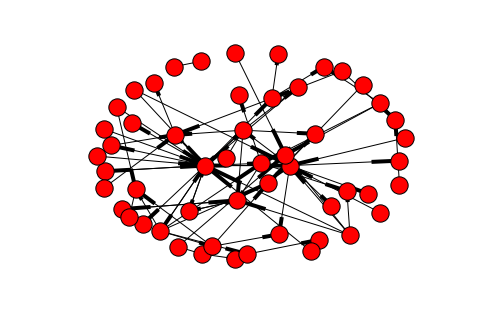

2015 10
3


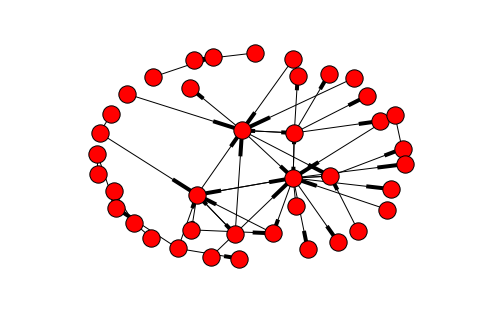

2015 11
4


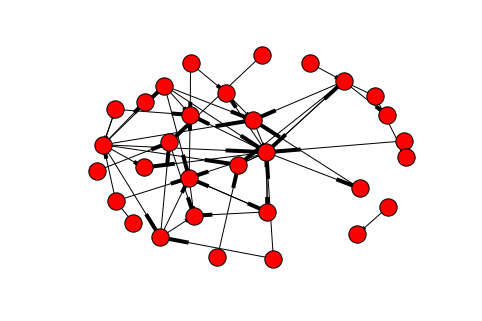

2015 12
4


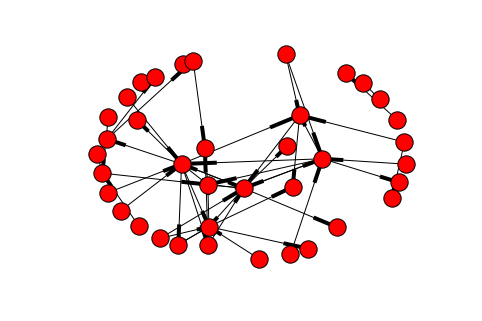

2016 1
4


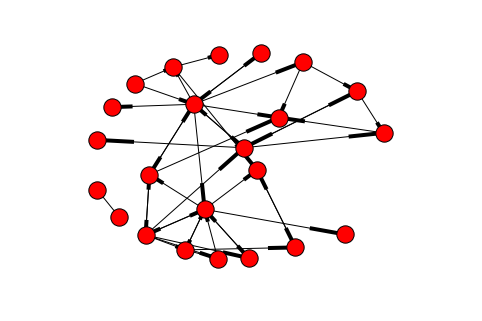

2016 2
3


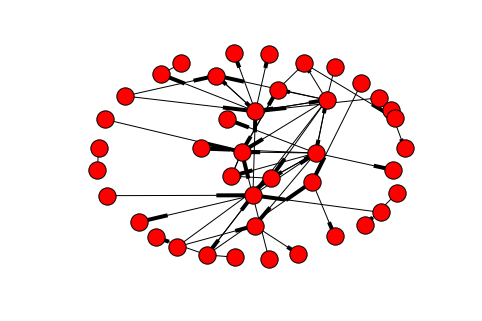

2016 3
4


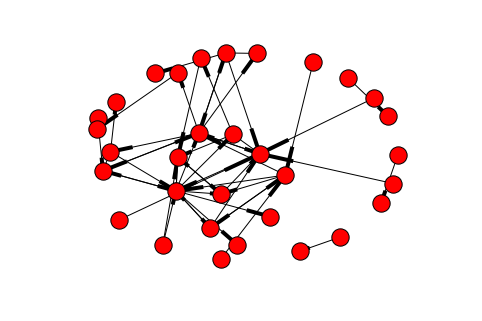

2016 4
4


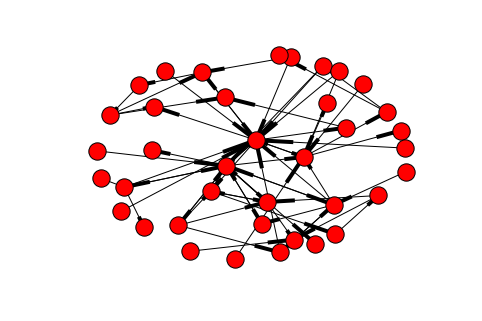

2016 5
3


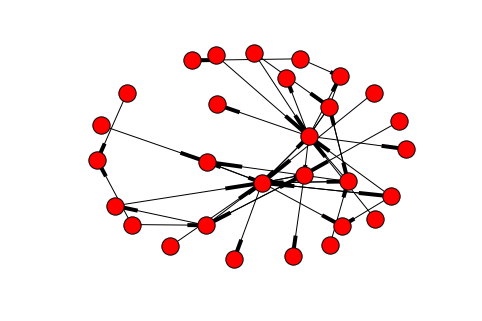

2016 6
4


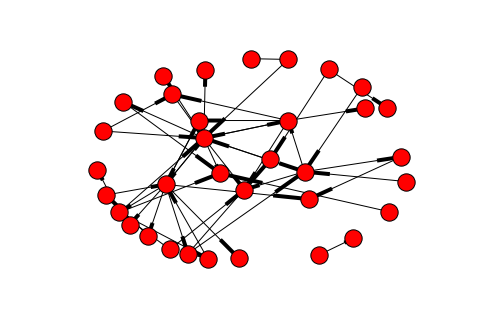

2016 7
3


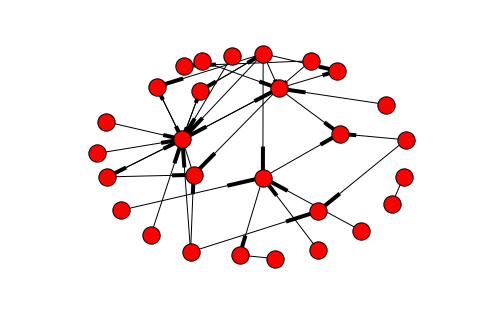

2016 8
4


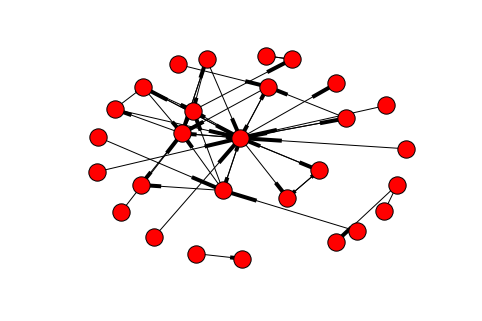

2016 9
3


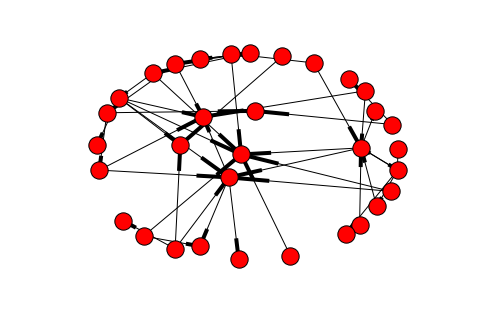

2016 10
4


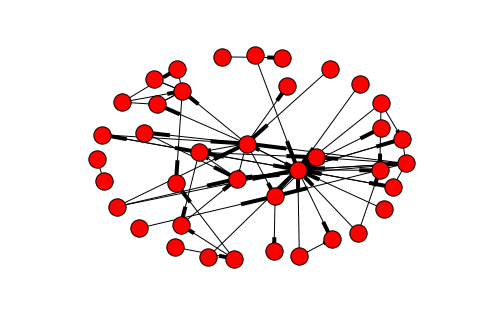

2016 11
4


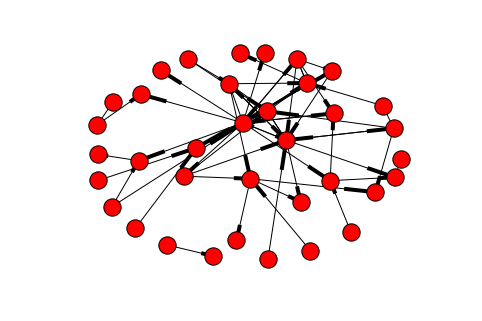

2016 12
4


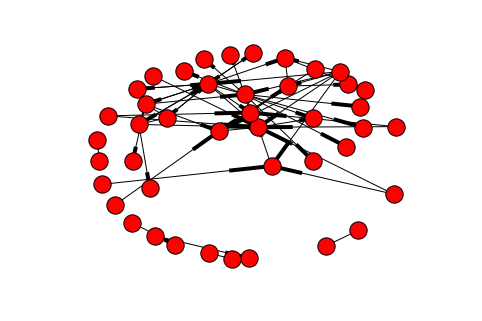

2017 1
4


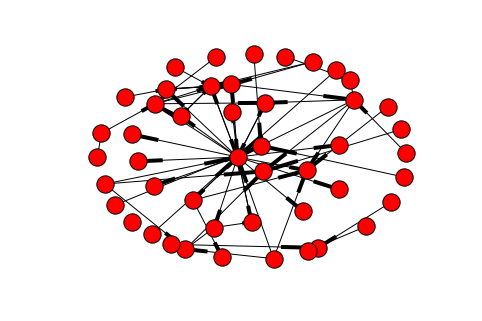

2017 2
3


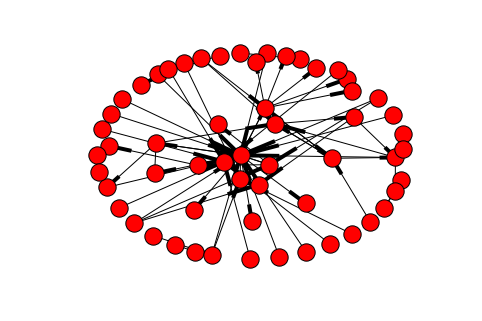

2017 3
4


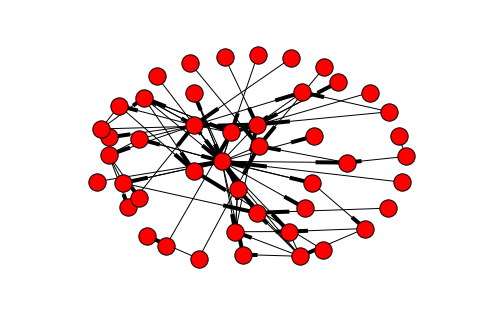

2017 4
4


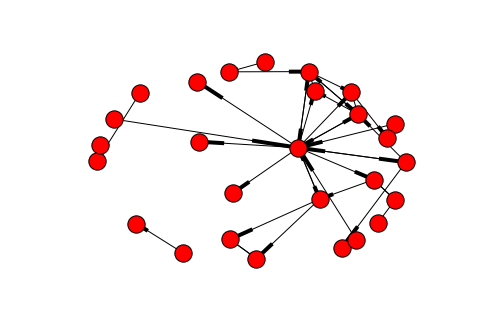

2017 5
3


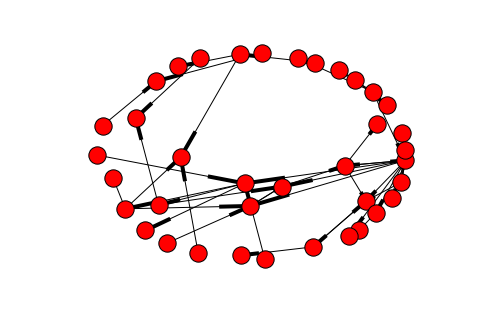

2017 6
4


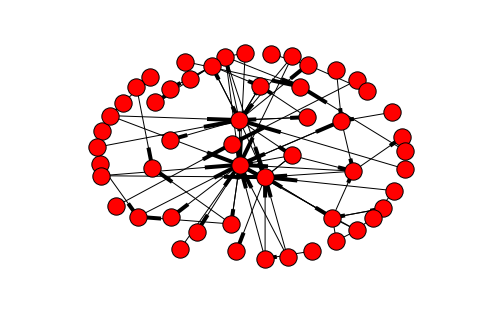

In [22]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        people = set()
        links = set()
        for idx in subset.index:
            author = subset.loc[idx].author_name
            msg = subset.loc[idx].message
            names = p.findall(msg)
            people.add(author.lower())
            for dev in names:
                dev = dev.strip().replace('"', '')
                people.add(dev.lower())
                links.add((dev.lower(), author.lower()))
        result[(year,month)] = {'people': people, 'n_people': len(people), 'n_links': len(links)}
        G = nx.DiGraph()
        G.add_edges_from(links)
        G2 = nx.Graph()
        G2.add_edges_from(links)
        print year, month
        print nx.graph_clique_number(G2)
        nx.draw(G)
        plt.show()

In [24]:
result[(2016,12)]

{'n_links': 65,
 'n_people': 51,
 'people': {u'alex deucher',
  u'alex williamson',
  u'ander conselvan de oliveira',
  u'arkadiusz hiler',
  u'bob paauwe',
  u'chris wilson',
  u'daniel vetter',
  u'daniele ceraolo spurio',
  u'david weinehall',
  u'deepak m',
  u'dhinakaran pandiyan',
  u'durgadoss r',
  u'elaine wang',
  u'emil velikov',
  u'geliang tang',
  u'hans de goede',
  u'imre deak',
  u'jan kara',
  u'jani nikula',
  u'jeff mcgee',
  u'jike song',
  u'joonas lahtinen',
  u'laurent pinchart',
  u'libin yang',
  u'lorenzo stoakes',
  u'lyude',
  u'maarten lankhorst',
  u'madhav chauhan',
  u'mahesh kumar',
  u'manasi navare',
  u'matthew auld',
  u'michal wajdeczko',
  u'micha\u0142 winiarski',
  u'michel thierry',
  u'mika kahola',
  u'mika kuoppala',
  u'min he',
  u'nagaraju, vathsala',
  u'nicholas mc guire',
  u'paulo zanoni',
  u'pei zhang',
  u'ping gao',
  u'robert bragg',
  u'rodrigo vivi',
  u'sinclair yeh',
  u'thomas gleixner',
  u'tomeu vizoso',
  u'tvrtko ursuli

In [25]:
df = pd.DataFrame(result).T

In [26]:
df['ratio'] = df.n_links / (df.n_people * (df.n_people - 1))

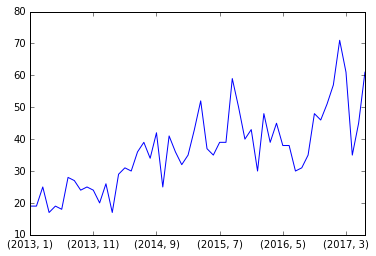

In [29]:
df.n_people.plot()

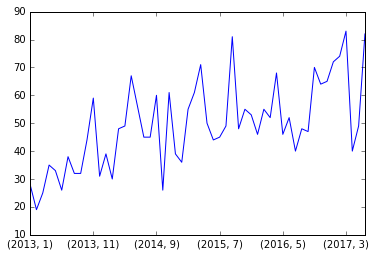

In [27]:
df.n_links.plot()

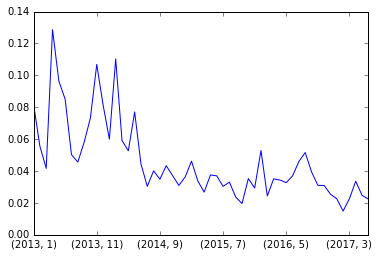

In [28]:
df.ratio.plot()

In [ ]:
# coordination relation

In [179]:
result = {}
reviewing = defaultdict(int)
reviewed = defaultdict(int)
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        people = set()
        links = defaultdict(int)
        for idx in subset.index:
            author = subset.loc[idx].author_name
            msg = subset.loc[idx].message
            names = p.findall(msg)
            people.add(author.lower())
            for dev in names:
                dev = dev.strip().replace('"', '')
                people.add(dev.lower())
                links[dev.lower(), author.lower()] += 1
                reviewing[dev.lower()] += 1
                reviewed[author.lower()] += 1
        result[(year,month)] = pd.Series(links).sort_values(ascending=False) #{'people': people, 'n_people': len(people), 'n_links': links}
        

In [180]:
for k in sorted(result.keys()):
    print k
    print result[k][:15]

(2013, 1)
damien lespiau  daniel vetter    11
rodrigo vivi    ben widawsky      9
imre deak       chris wilson      6
paulo zanoni    ville syrjälä     5
jani nikula     paulo zanoni      5
imre deak       daniel vetter     5
rob clark       daniel vetter     4
damien lespiau  ben widawsky      2
jesse barnes    chris wilson      2
chris wilson    daniel vetter     1
                ben widawsky      1
                jani nikula       1
                mika kuoppala     1
carl worth      ben widawsky      1
ben widawsky    daniel vetter     1
dtype: int64
(2013, 2)
chris wilson    ville syrjälä       5
rob clark       daniel vetter       3
ben widawsky    daniel vetter       3
damien lespiau  ville syrjälä       2
chris wilson    patrik jakobsson    2
paulo zanoni    damien lespiau      2
ben widawsky    paulo zanoni        1
                ville syrjälä       1
chris wilson    ben widawsky        1
                imre deak           1
                jani nikula         1
ville syr

In [181]:
pd.Series(reviewing).sort_values(ascending=False)[:20]

chris wilson                   1131
ville syrjälä                   991
joonas lahtinen                 689
tvrtko ursulin                  519
paulo zanoni                    477
daniel vetter                   456
mika kuoppala                   449
imre deak                       419
jani nikula                     405
rodrigo vivi                    356
damien lespiau                  331
jesse barnes                    313
maarten lankhorst               308
matthew auld                    193
matt roper                      156
ben widawsky                    152
ander conselvan de oliveira     148
patrik jakobsson                 71
david weinehall                  67
deepak s                         56
dtype: int64

In [182]:
pd.Series(reviewed).sort_values(ascending=False)[:20]

chris wilson                   1723
ville syrjälä                  1528
daniel vetter                   741
imre deak                       476
jani nikula                     415
paulo zanoni                    387
maarten lankhorst               298
tvrtko ursulin                  286
damien lespiau                  271
mika kuoppala                   241
ben widawsky                    225
rodrigo vivi                    211
ander conselvan de oliveira     194
jesse barnes                    101
matt roper                       99
michel thierry                   82
john harrison                    81
dave gordon                      80
oscar mateo                      77
joonas lahtinen                  50
dtype: int64

In [161]:
ratio = {}
reverse = {}

for k in reviewed.keys():
    if reviewed[k] != 0:
        ratio[k] = reviewing[k] * 1.0 / reviewed[k]
    if reviewing[k] != 0:
        reverse[k] = reviewed[k] * 1.0 / reviewing[k]


In [162]:

pd.Series(ratio).sort_values(ascending=False)[:10]

thomas wood          21.000000
sourab gupta         18.000000
joonas lahtinen      13.780000
durgadoss r          13.333333
daniel stone         11.000000
jim bride            10.666667
tomas elf             9.333333
art runyan            7.000000
david weinehall       6.090909
rafael antognolli     6.000000
dtype: float64

In [163]:

pd.Series(reverse).sort_values(ascending=False)[:10]

vandana kannan     33.000000
john harrison      13.500000
oscar mateo        12.833333
gaurav k singh      8.500000
gustavo padovan     7.333333
jordan justen       7.000000
chuanxiao dong      6.000000
zhi wang            6.000000
deepak m            5.500000
robert bragg        3.800000
dtype: float64

In [145]:
reviewing['joonas lahtinen'], reviewed['joonas lahtinen']

(689, 50)

In [146]:
reviewing['chris wilson'], reviewed['chris wilson']

(1131, 1723)

In [148]:
reviewing[u'ville syrjälä'], reviewed[u'ville syrjälä']

(991, 1528)

In [149]:
reviewing['tvrtko ursulin'], reviewed['tvrtko ursulin']

(519, 286)

In [150]:
reviewing['mika kuoppala'], reviewed['mika kuoppala']

(449, 241)

In [151]:
reviewing['rodrigo vivi'], reviewed['rodrigo vivi']

(356, 211)

In [152]:
reviewing['imre deak'], reviewed['imre deak']

(419, 476)

In [153]:
reviewing['jani nikula'], reviewed['jani nikula']

(405, 415)

In [154]:
reviewing['daniel vetter'], reviewed['daniel vetter']

(456, 741)

In [168]:
reviewing['paulo zanoni'], reviewed['paulo zanoni']

(477, 387)

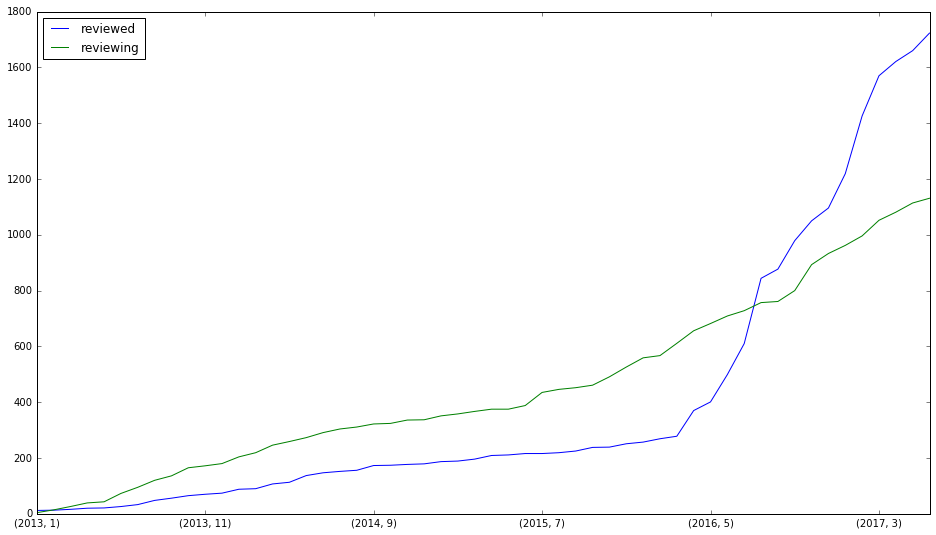

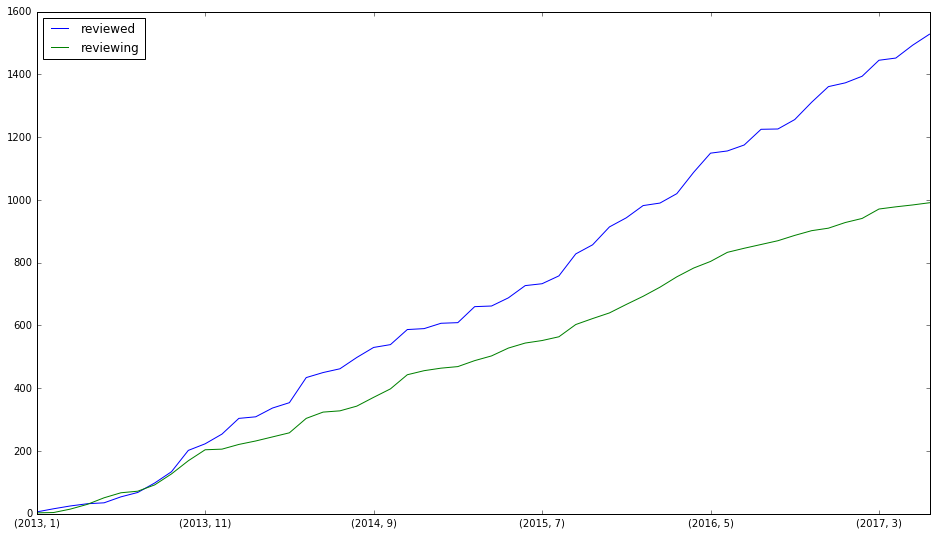

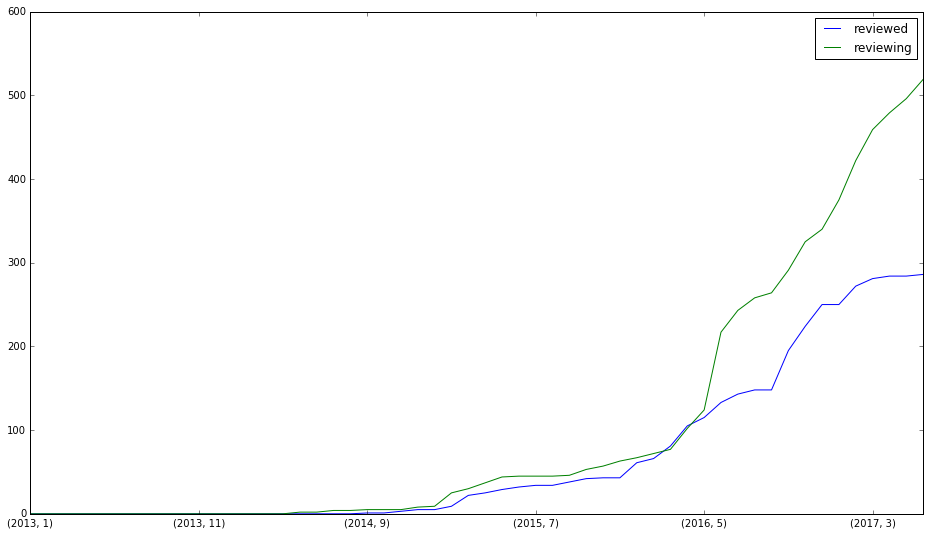

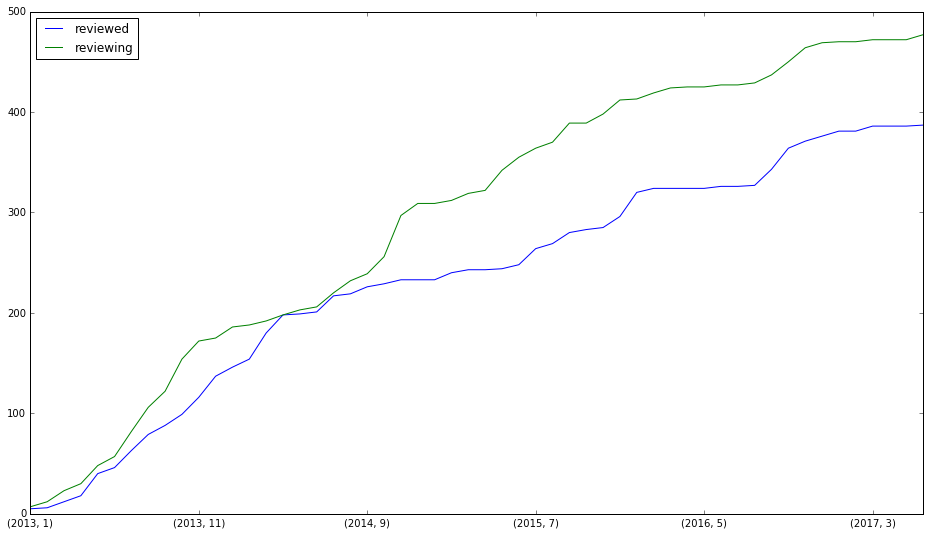

In [192]:
names = ['chris wilson', u'ville syrjälä', 'tvrtko ursulin', 'paulo zanoni']

for name in names:
    snapshot = {}
    reviewing = 0
    reviewed = 0
    for year in range(2013,2018):
        for month in range(1,13):
            if year == 2017 and month > 6:
                break
            for reviewer, author in result[(year,month)].index:
                if reviewer == name:
                    reviewing += result[(year,month)][(reviewer, author)]
                if author == name:
                    reviewed += result[(year,month)][(reviewer, author)]
            snapshot[(year, month)] = {'reviewed': reviewed, 'reviewing': reviewing}
    plt.figure(facecolor='white', figsize=(16,9))
    pd.DataFrame(snapshot).T.plot( figsize=(16,9))
    plt.show()

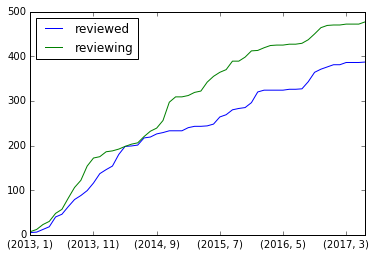

In [187]:

pd.DataFrame(snapshot).T.plot()

In [171]:
for k in result[(2013,2)].index:
    break
k

(u'chris wilson', u'ville syrj\xe4l\xe4')

In [182]:
result = {}

for year in range(2013,2018):
    for month in range(1,13):
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        #print year, month

        result[(year,month)] = len(set(subset.committer_name))

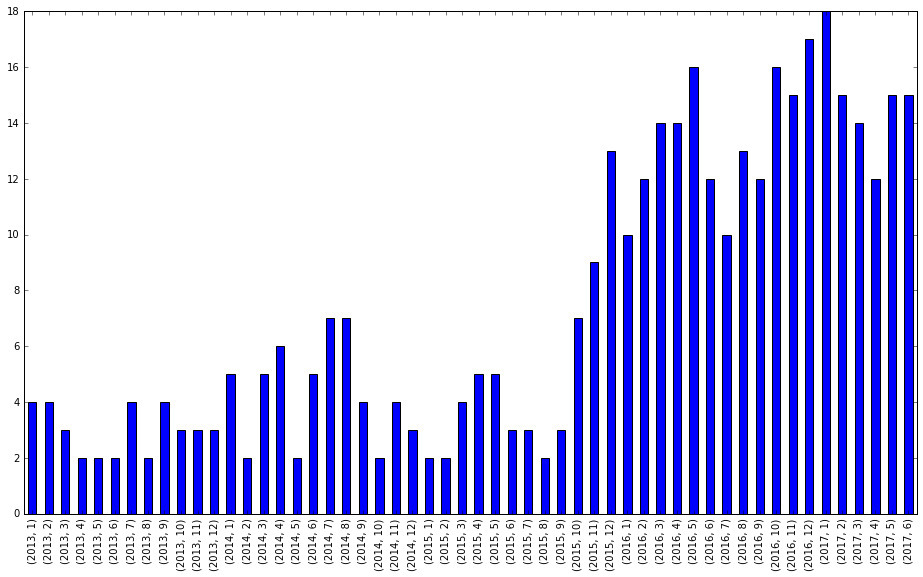

In [183]:
plt.figure(figsize=(16,9))
pd.Series(result).plot('bar', color='blue')

In [214]:
# author = committer

In [31]:
before = selected[selected.committed_datetime.map(lambda t: (t.year * 100 + t.month < 201509) & (t.year * 100 + t.month > 201300) ) ]
after = selected[selected.committed_datetime.map(lambda t: t.year * 100 + t.month) > 201600]

In [32]:
(before.author_name == before.committer_name).value_counts(normalize=True)

False    0.847347
True     0.152653
dtype: float64

In [33]:
before[before.author_name == before.committer_name].message.map(lambda m: "Reviewed-by" in m).value_counts(normalize=True)

True     0.751732
False    0.248268
Name: message, dtype: float64

In [34]:
before[before.author_name != before.committer_name].message.map(lambda m: "Reviewed-by" in m).value_counts(normalize=True)

True     0.69482
False    0.30518
Name: message, dtype: float64

In [62]:
df = before[before.author_name == before.committer_name]
(df.committed_datetime - df.authored_datetime).describe()

count                        866
mean     10 days 02:47:05.227482
std      22 days 06:21:20.760144
min            -1 days +23:59:44
25%              0 days 16:31:03
50%       4 days 00:52:58.500000
75%      10 days 10:25:44.750000
max            353 days 01:01:45
Name: committed_datetime, dtype: object

In [63]:
df = before[before.author_name != before.committer_name]
(df.committed_datetime - df.authored_datetime).describe()

count                       4807
mean     12 days 03:19:48.243603
std      33 days 09:22:45.349661
min            -1 days +03:05:48
25%              1 days 07:37:40
50%              5 days 13:02:29
75%             11 days 22:47:31
max            587 days 21:05:48
Name: committed_datetime, dtype: object

In [35]:
(after.author_name == after.committer_name).value_counts(normalize=True)

True     0.653174
False    0.346826
dtype: float64

In [36]:
after[after.author_name == after.committer_name].message.map(lambda m: "Reviewed-by" in m).value_counts(normalize=True)

True     0.940862
False    0.059138
Name: message, dtype: float64

In [37]:
after[after.author_name != after.committer_name].message.map(lambda m: "Reviewed-by" in m).value_counts(normalize=True)

True     0.73282
False    0.26718
Name: message, dtype: float64

In [64]:
df = after[after.author_name == after.committer_name]
(df.committed_datetime - df.authored_datetime).describe()

count                       3179
mean      4 days 17:46:23.374331
std      15 days 22:46:05.247108
min              0 days 00:00:00
25%       0 days 01:55:13.500000
50%              0 days 18:15:29
75%       2 days 23:59:41.500000
max            331 days 05:16:05
Name: committed_datetime, dtype: object

In [65]:
df = after[after.author_name != after.committer_name]
(df.committed_datetime - df.authored_datetime).describe()

count                       1688
mean      9 days 13:38:53.865521
std      25 days 20:22:52.898594
min            -5 days +17:45:30
25%       0 days 18:45:45.750000
50%       3 days 17:43:37.500000
75%       9 days 22:49:23.250000
max            556 days 01:56:19
Name: committed_datetime, dtype: object

In [194]:
# interaction with others?

In [245]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        if year == 2017 and month > 6:
            break
        interaction = defaultdict(set)
        name_counts = subset.author_name.value_counts()
        for idx in subset.index:
            author = subset.loc[idx].author_name
            if name_counts[author] <= 1:
                continue
            msg = subset.loc[idx].message
            names = p.findall(msg)
            for dev in names:
                dev = dev.strip().replace('"', '').lower()
                interaction[author].add(dev)
        result[(year,month)] = pd.Series(map(lambda s: len(s), interaction.values())).describe()

In [246]:
pd.DataFrame(result).T

count      mean       std  min   25%  50%   75%   max
2013 1     6.0  4.166667  3.188521  1.0  1.25  4.0  6.75   8.0
     2     7.0  2.142857  1.676163  1.0  1.00  1.0  3.00   5.0
     3    12.0  2.083333  1.781640  1.0  1.00  1.5  2.00   7.0
     4    11.0  3.090909  1.868397  1.0  2.00  3.0  3.50   8.0
     5    12.0  2.666667  1.497473  1.0  2.00  2.0  3.00   6.0
     6     7.0  2.857143  2.340126  1.0  1.00  2.0  4.00   7.0
     7    12.0  2.833333  2.167249  1.0  1.75  2.0  3.25   8.0
     8    11.0  2.454545  1.368476  1.0  1.50  2.0  3.50   5.0
     9     8.0  3.375000  1.767767  1.0  1.75  4.0  5.00   5.0
     10   10.0  4.200000  2.299758  1.0  2.50  4.5  5.75   8.0
     11   12.0  4.416667  3.315483  1.0  2.00  3.5  7.00  12.0
     12   10.0  2.800000  1.873796  1.0  1.25  2.5  3.75   7.0
2014 1    13.0  2.769231  1.964427  1.0  1.00  2.0  4.00   7.0
     2    10.0  2.700000  1.494434  1.0  2.00  2.5  3.00   6.0
     3    14.0  3.214286  2.455091  1.0  2.00  2.0  3.00   9.0
     4    15.0  3.000000  2.070197  1.0  1.50  2.0  4.00   7.0
     5    15.0  4.066667  3.844600  1.0  1.00  3.0  5.00  14.0
     6    18.0  2.777778  1.957055  1.0  1.00  2.0  4.00   7.0
     7    17.0  2.411765  1.325652  1.0  1.00  2.0  3.00   5.0
     8    17.0  2.352941  1.868863  1.0  1.00  2.0  3.00   8.0
     9    19.0  2.684211  2.381704  1.0  1.00  1.0  4.00   9.0
     10   10.0  2.300000  1.888562  1.0  1.00  1.0  3.00   6.0
     11   23.0  2.304348  1.635815  1.0  1.00  2.0  3.00   8.0
     12   18.0  1.833333  1.339447  1.0  1.00  1.0  2.75   6.0
2015 1    14.0  1.928571  0.997249  1.0  1.00  2.0  2.75   4.0
     2    23.0  2.086957  1.856513  1.0  1.00  2.0  2.00   9.0
     3    21.0  2.476190  2.293884  1.0  1.00  2.0  3.00  11.0
     4    23.0  2.565217  1.502304  1.0  1.50  2.0  3.00   7.0
     5    23.0  1.956522  1.296087  1.0  1.00  1.0  2.50   5.0
     6    17.0  2.176471  1.740521  1.0  1.00  2.0  2.00   8.0
     7    16.0  2.187500  1.167262  1.0  1.00  2.0  3.00   5.0
     8    20.0  2.050000  1.050063  1.0  1.00  2.0  3.00   4.0
     9    28.0  2.535714  2.486737  1.0  1.00  2.0  3.00  13.0
     10   16.0  2.312500  1.956826  1.0  1.00  1.5  2.25   7.0
     11   18.0  2.888889  1.936914  1.0  1.25  2.0  4.00   8.0
     12   17.0  2.705882  1.794600  1.0  1.00  2.0  4.00   6.0
2016 1    19.0  2.315789  1.157230  1.0  1.50  2.0  3.00   5.0
     2    17.0  2.588235  1.416811  1.0  2.00  2.0  3.00   6.0
     3    17.0  2.764706  2.222876  1.0  1.00  2.0  3.00   8.0
     4    19.0  3.105263  2.979462  1.0  1.00  2.0  3.50  12.0
     5    12.0  3.166667  2.516611  1.0  1.00  3.0  3.25   9.0
     6    18.0  2.444444  1.616904  1.0  1.00  2.0  3.75   7.0
     7    13.0  3.000000  2.677063  1.0  2.00  2.0  3.00  11.0
     8    15.0  3.000000  2.951997  1.0  1.00  2.0  3.00  12.0
     9    18.0  2.277778  1.903729  1.0  1.00  1.0  2.75   7.0
     10   21.0  3.095238  2.913842  1.0  1.00  2.0  4.00  14.0
     11   19.0  2.894737  1.997074  1.0  2.00  2.0  3.00   8.0
     12   21.0  2.619048  2.334014  1.0  1.00  2.0  3.00  10.0
2017 1    22.0  2.954545  2.235584  1.0  1.25  2.0  3.75  10.0
     2    20.0  2.950000  3.619756  1.0  1.00  2.0  3.00  17.0
     3    22.0  3.363636  2.920298  1.0  1.00  3.0  4.00  13.0
     4    16.0  2.250000  1.483240  1.0  1.00  2.0  3.00   7.0
     5    17.0  2.176471  1.509772  1.0  1.00  1.0  3.00   5.0
     6    19.0  3.210526  3.750244  1.0  1.00  2.0  3.00  15.0

In [103]:
# maintainer vs. non maintainer involvement

In [91]:
result = {}
for year in range(2013,2018):
    for month in range(1,13):
        if year == 2017 and month > 6:
            break
        counter = defaultdict(int)
        subset = selected[selected.committed_datetime.map(lambda t: t.year * 1000 + t.month) == (year * 1000 + month)]
        
        #print year, month
        by_maintainer = 0
        reviewers = set()
        for msg in subset.message:
            names = p.findall(msg)
            if len(names) == 0:
                by_maintainer += 1
            for dev in names:
                dev = dev.strip().replace('"', '').lower()
                reviewers.add(dev)
                counter[dev] += 1
        by_maintainer += counter['daniel vetter']
        if year > 2013:
            by_maintainer += counter['jani nikula']
        result[(year,month)] = by_maintainer * 1.0 / subset.shape[0]
        

In [118]:
pd.Series(result)[:32].describe()

count    32.000000
mean      0.348004
std       0.094241
min       0.143836
25%       0.304231
50%       0.348716
75%       0.401188
max       0.519231
dtype: float64

In [120]:
pd.Series(result)[36:].describe()

count    18.000000
mean      0.230111
std       0.064528
min       0.120805
25%       0.197276
50%       0.211908
75%       0.235962
max       0.367150
dtype: float64

In [109]:
s1 = selected[(selected.committed_datetime >= "20130101") & (selected.committed_datetime < "20150901")]
s2 = selected[(selected.committed_datetime >= "20160101") & (selected.committed_datetime < "20170701")]

In [117]:
by_maintainer = 0
for year in range(2013,2018):
    counter = defaultdict(int)
    subset = s1[s1.committed_datetime.map(lambda t: t.year == year)]

    for msg in subset.message:
        names = p.findall(msg)
        if len(names) == 0:
            by_maintainer += 1
        for dev in names:
            dev = dev.strip().replace('"', '').lower()
            reviewers.add(dev)
            counter[dev] += 1
    by_maintainer += counter['daniel vetter']
    if year > 2013:
        by_maintainer += counter['jani nikula']
print by_maintainer, by_maintainer * 1.0 / s1.shape[0]

1933 0.34073682355


In [115]:
by_maintainer = 0
for year in range(2013,2018):
    counter = defaultdict(int)
    subset = s2[s2.committed_datetime.map(lambda t: t.year == year)]

    for msg in subset.message:
        names = p.findall(msg)
        if len(names) == 0:
            by_maintainer += 1
        for dev in names:
            dev = dev.strip().replace('"', '').lower()
            reviewers.add(dev)
            counter[dev] += 1
    by_maintainer += counter['daniel vetter']
    by_maintainer += counter['jani nikula']
print by_maintainer, by_maintainer * 1.0 / s2.shape[0]

1029 0.227202472952


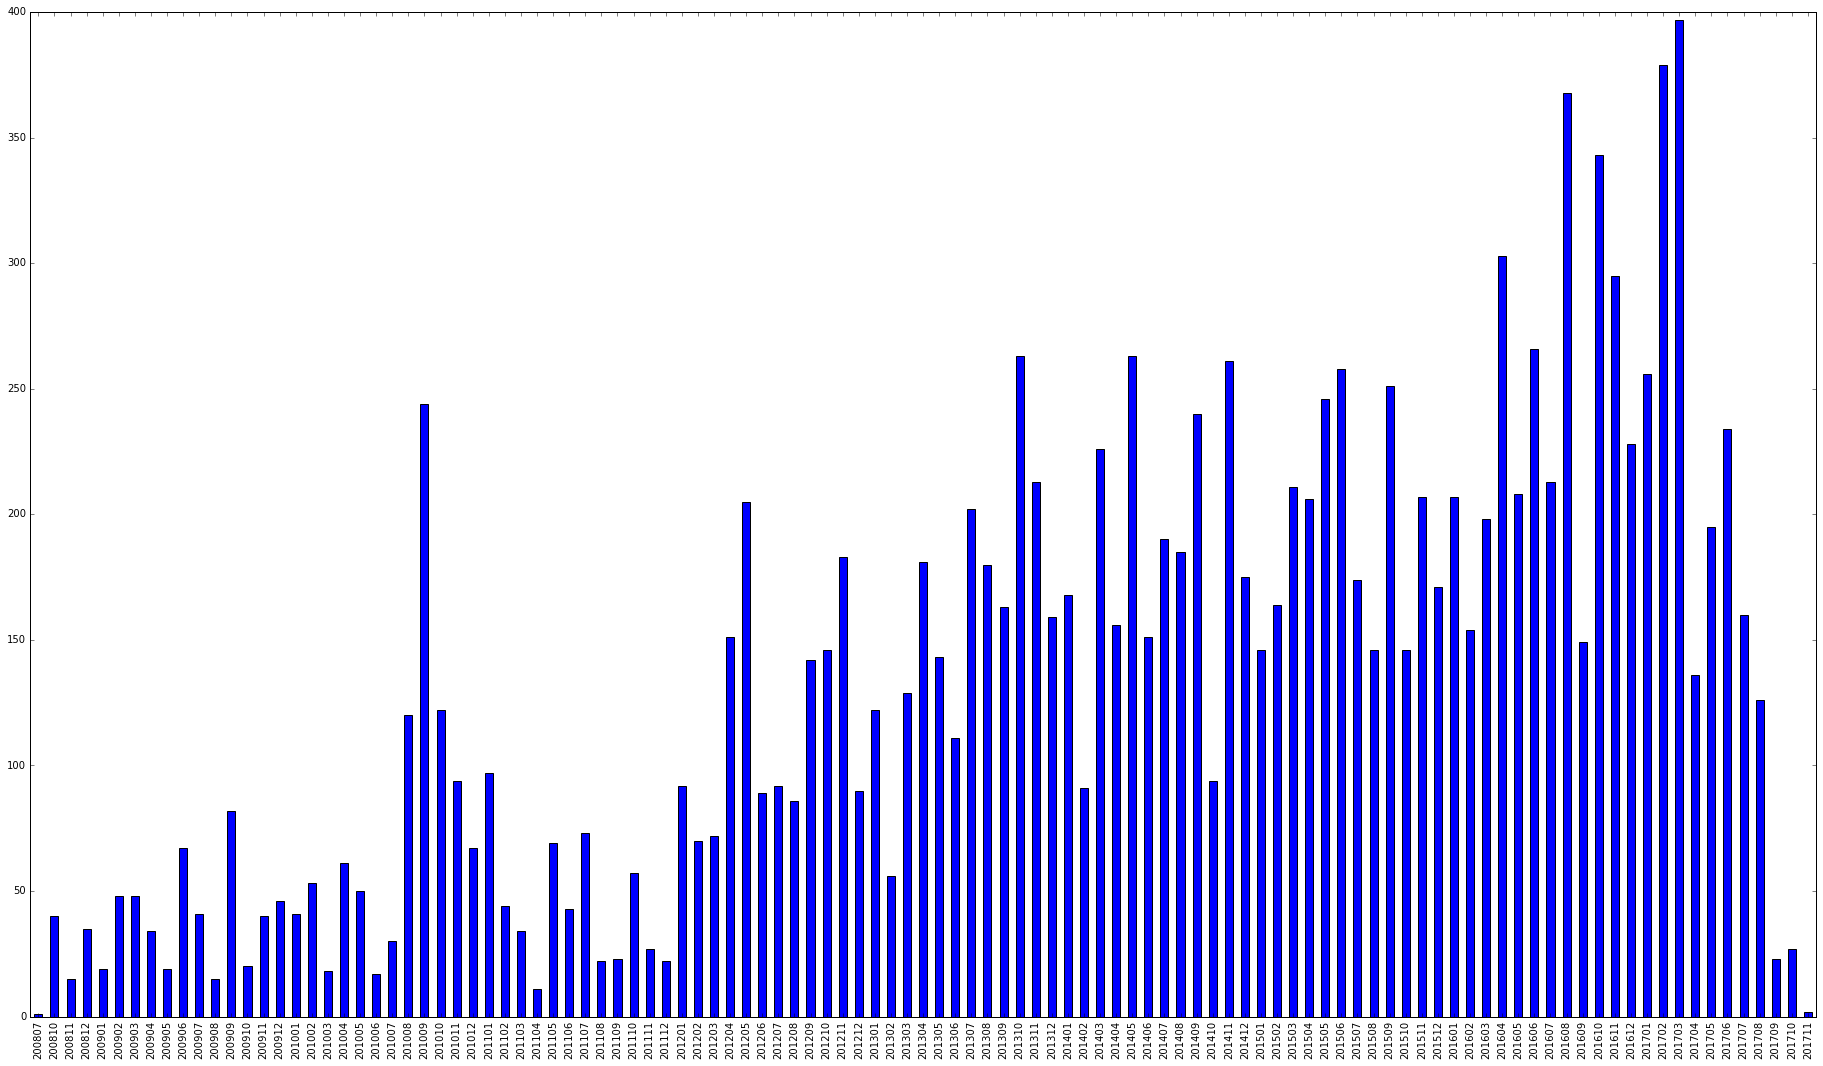

In [107]:
plt.figure(figsize=(32,18))
selected.committed_datetime.map(lambda t: 100 * t.year + t.month).value_counts().sort_index().plot('bar', color='blue')